## Heart Failure

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

### Import Dataset

In [4]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Inspection

In [7]:
df.shape

(918, 12)

In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Exploratory Data Analysis

#### 1. Target variable distribution: This bar chart shows how many patients do and do not have heart disease. It's useful for determining whether the data set is balanced between the two classes.

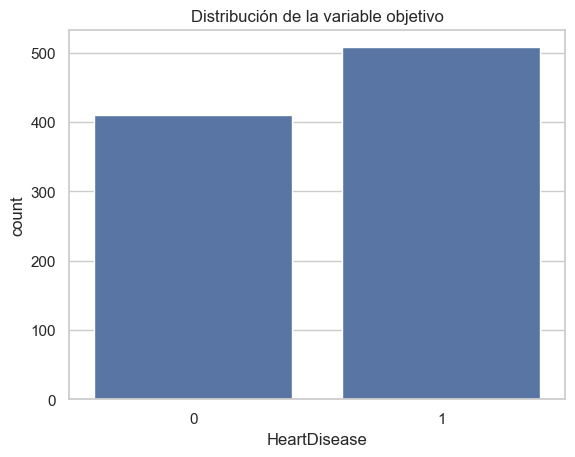

In [13]:
sns.countplot(data=df, x='HeartDisease')
plt.title("Distribución de la variable objetivo")
plt.show()

#### 2. Age distribution: This graph shows the age distribution in the dataset. The KDE (density estimate) curve shows how the most common patient ages cluster.

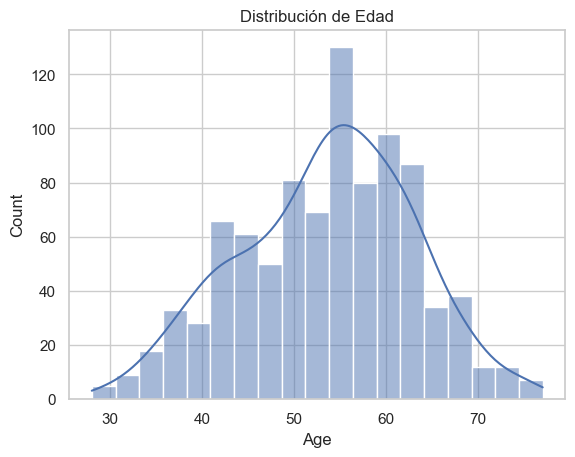

In [14]:
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

#### 3. Boxplot for cholesterol (Outlier detection): This boxplot allows you to identify cholesterol distribution and potential outliers. Points outside the whiskers represent outliers that could affect the analysis.

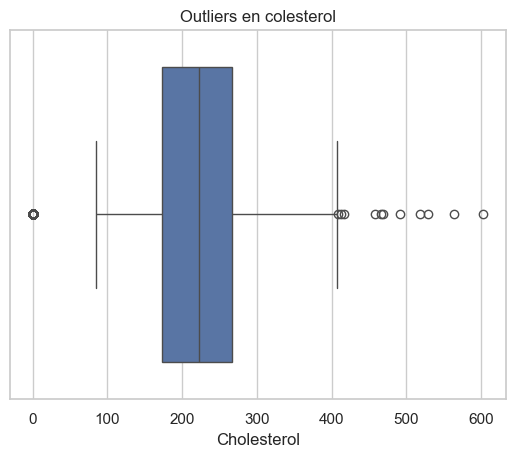

In [ ]:
sns.boxplot(x='Cholesterol', data=df)
plt.title("Outliers en colesterol")
plt.show()

#### 4. Violin Plot: This graph shows the distribution of cholesterol levels according to the presence or absence of heart disease. It combines information from a boxplot with the density of the data, facilitating comparisons between the two classes.

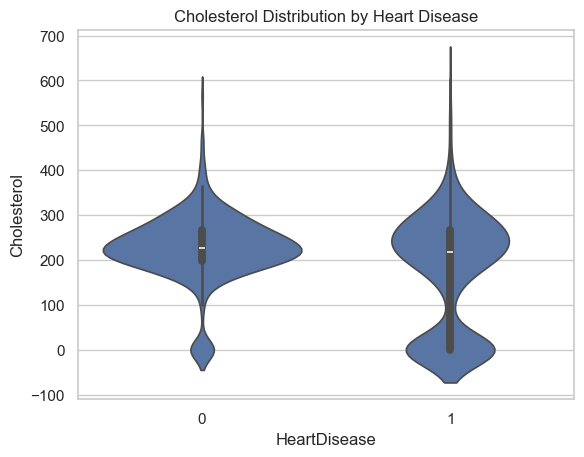

In [ ]:
sns.violinplot(data=df, x="HeartDisease", y="Cholesterol")
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()


#### 5.KDE Plot (Kernel Density Estimation): This graph compares the distribution of maximum heart rate (MaxHR) between patients with and without heart disease. The curves allow for smooth and continuous visualization of differences in trends within each group.

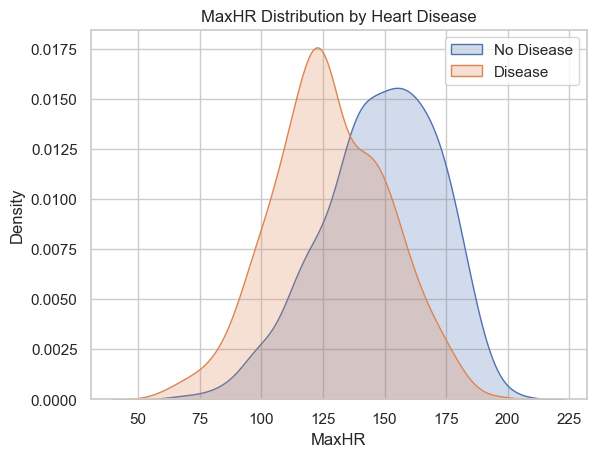

In [27]:
sns.kdeplot(data=df[df['HeartDisease'] == 0]['MaxHR'], label="No Disease", fill=True)
sns.kdeplot(data=df[df['HeartDisease'] == 1]['MaxHR'], label="Disease", fill=True)
plt.title("MaxHR Distribution by Heart Disease")
plt.legend()
plt.show()


#### 6. Pair Plot: This graph shows the relationships between pairs of numerical variables, differentiated by heart disease class. It is useful for identifying patterns, correlations, and possible class separations.

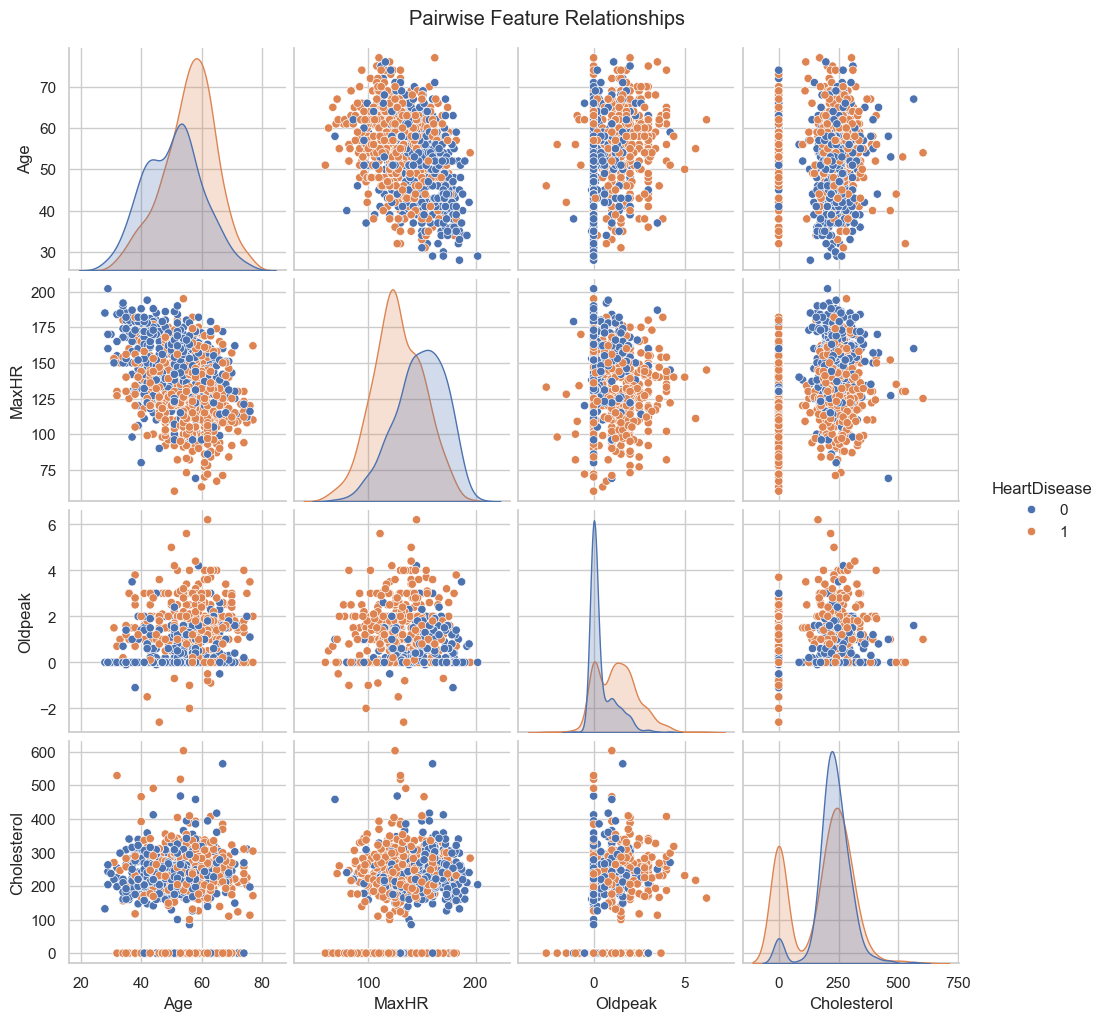

In [ ]:
selected = ['Age', 'MaxHR', 'Oldpeak', 'Cholesterol', 'HeartDisease']
sns.pairplot(df[selected], hue='HeartDisease')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

##### This scatter plot shows the relationship between age and maximum heart rate, differentiating by the presence of disease. It is useful for detecting possible clusters, trends, or separations between classes.

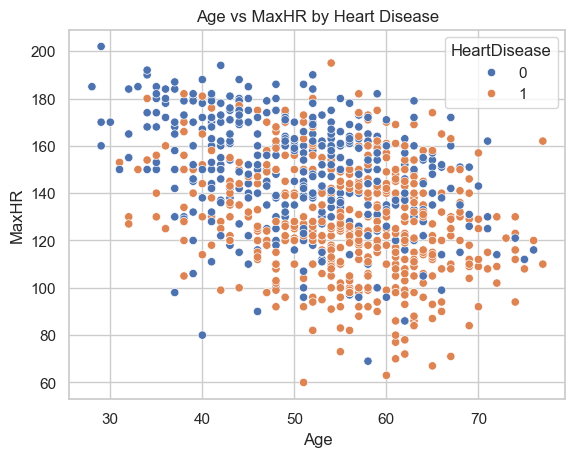

In [32]:
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease')
plt.title("Age vs MaxHR by Heart Disease")
plt.show() 

### 7. Function for bivariate analysis (histogram + KDE): This function generates two side-by-side graphs for a variable: a histogram and a density curve (KDE), both separated by heart disease class. It allows you to visualize and compare how that variable is distributed between patients with and without disease.

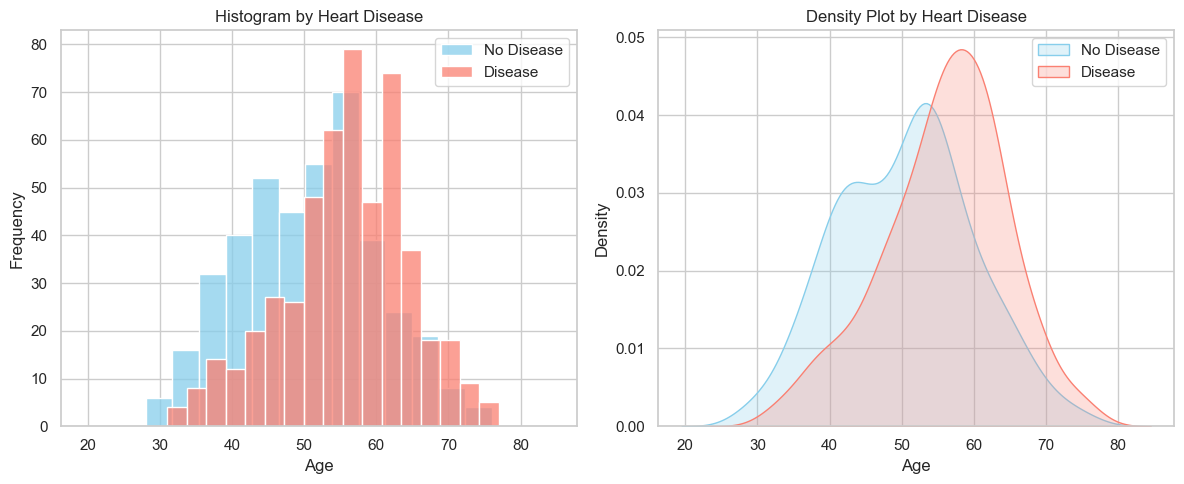

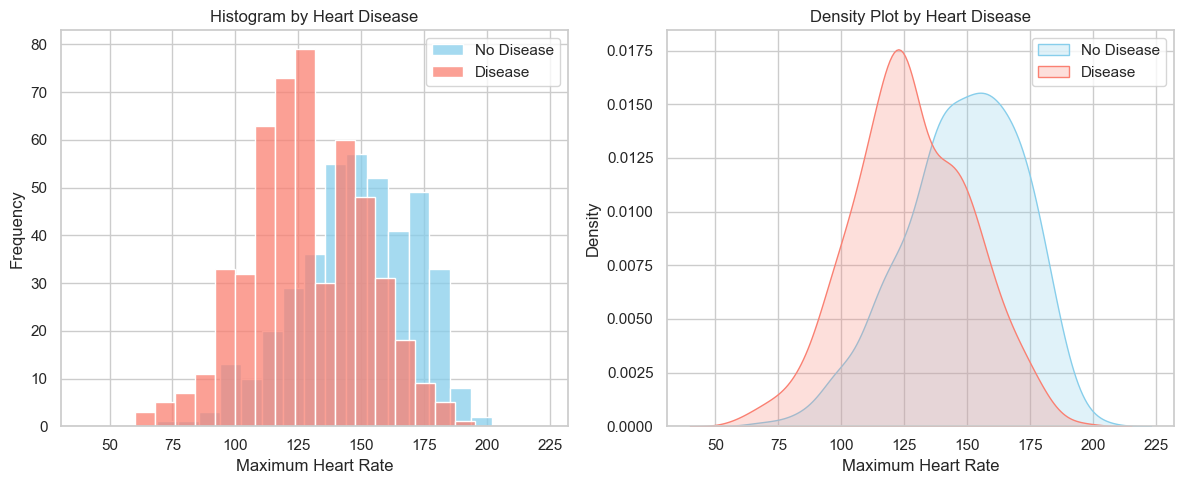

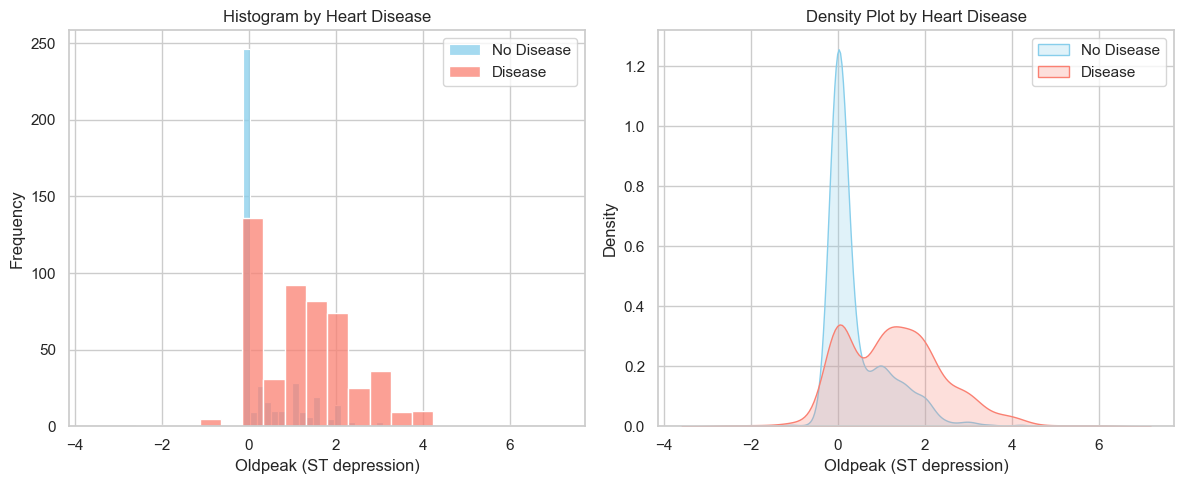

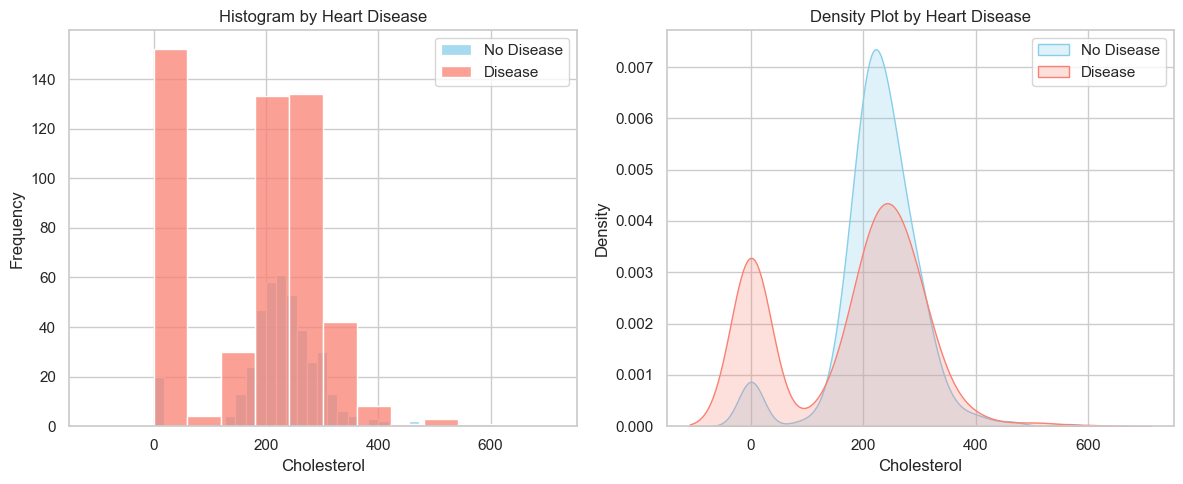

In [38]:
def bivariable_analysis(var, var_title):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=True)

    # Histogram by HeartDisease
    sns.histplot(data=df[df['HeartDisease'] == 0], x=var, label='No Disease', ax=ax[0], color='skyblue')
    sns.histplot(data=df[df['HeartDisease'] == 1], x=var, label='Disease', ax=ax[0], color='salmon')
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram by Heart Disease')
    ax[0].legend()

    # KDE Plot by HeartDisease
    sns.kdeplot(data=df[df['HeartDisease'] == 0], x=var, label='No Disease', fill=True, ax=ax[1], color='skyblue')
    sns.kdeplot(data=df[df['HeartDisease'] == 1], x=var, label='Disease', fill=True, ax=ax[1], color='salmon')
    ax[1].set_xlabel(var_title)
    ax[1].set_title('Density Plot by Heart Disease')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

bivariable_analysis('Age', 'Age')
bivariable_analysis('MaxHR', 'Maximum Heart Rate')
bivariable_analysis('Oldpeak', 'Oldpeak (ST depression)')
bivariable_analysis('Cholesterol', 'Cholesterol')




### 8. Boxplot de RestingBP: This graph shows the distribution of resting blood pressure (RBP) by heart disease class. It allows for comparing medians and ranges and detecting potential outliers between the two groups.

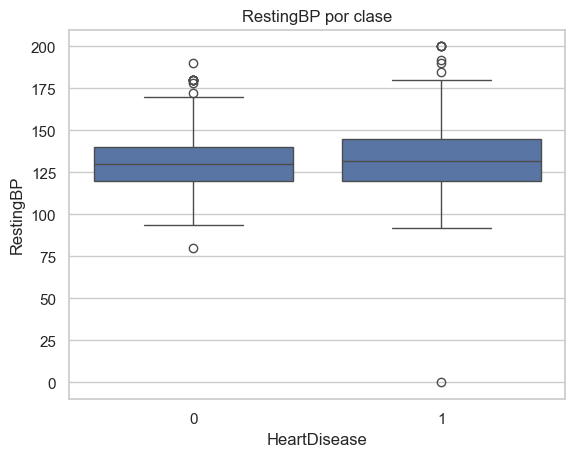

In [39]:
sns.boxplot(data=df, x='HeartDisease', y='RestingBP')
plt.title("RestingBP por clase")
plt.show()

### Extra. 3D scatter plot: This three-dimensional graph visualizes the joint relationship between age, maximum heart rate, and peak age. Color indicates the presence or absence of heart disease, making it easier to observe patterns or groupings among classes.

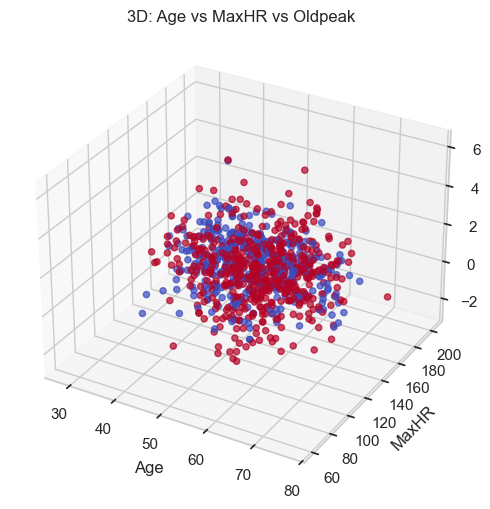

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['MaxHR'], df['Oldpeak'], c=df['HeartDisease'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Age')
ax.set_ylabel('MaxHR')
ax.set_zlabel('Oldpeak')
ax.set_title('3D: Age vs MaxHR vs Oldpeak')
plt.show()
